# Exploring Reasons Behind Student Dropout in Schools

## Abstract 
This is a data science project in which an algorithm is created to distinguish dropout students from Graduate and Enrolled students. The dataset includes numerous variables that are used to train the data for student categorization. The main phases include data cleaning, exploratory data analysis, and implementing a machine learning algorithm. 

## Introduction
In the modern day, high-quality education is essential for students since employment competition is high. However, student dropout is a problem that must be addressed properly and with a well-thought-out approach. To give a long-term solution, it is essential to understand the root cause of high dropout rates. Dropout rates are influenced by a variety of social and economic factors. This in-depth analysis focuses on the reasons behind dropouts and the factors that influence student education. 

## Dataset Selection
This dataset provides a detailed view on students academic performance based on their demographics, social and economic status. All the information mentioned above is taken at the time of admission. This project is focused on measuring student academic success based on different factors such as application mode and demographics. Additionally, curricular units (credited/enrolled/evaluations/approved) and grades provided at the end of the semester can further assist in the betterment of the analysis and implementation of the algorithm. Finally, factors like GDP, employment rate and inflation rate can also be used to make the analysis better by providing context for economic factors. This dataset is provided by UCI Machine learning repository. The link to the dataset is:
- https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success.

This dataset is chosen because it is a crucial factor in the society as competition in the job market is really high and the dropout rate needs to be low.

### Description of the variables
- Marital status: The marital status of the student. (Categorical)
- Application mode: The method of application used by the student. (Categorical)
- Application order: The order in which the student applied. (Numerical)
- Course: The course taken by the student. (Categorical)
- Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
- Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
- Nationality: The nationality of the student. (Categorical)
- Mother's qualification: The qualification of the student's mother. (Categorical)
- Father's qualification: The qualification of the student's father. (Categorical)
- Mother's occupation: The occupation of the student's mother. (Categorical)
- Father's occupation: The occupation of the student's father. (Categorical)
- Displaced: Whether the student is a displaced person. (Categorical)
- Educational special needs: Whether the student has any special educational needs. (Categorical)
- Debtor: Whether the student is a debtor. (Categorical)
- Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
- Gender: The gender of the student. (Categorical)
- Scholarship holder: Whether the student is a scholarship holder. (Categorical)
- Age at enrollment: The age of the student at the time of enrollment. (Numerical)
- International: Whether the student is an international student. (Categorical)
- Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
- Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
- Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
- Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

## Importing Required Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import validation_curve

## Data Ingestion

In [100]:
df_student_dropout=pd.read_csv(r"C:\Users\BAHU Computers\Desktop\Python algorithm\Student_Dropout.csv")
pd.set_option('display.max_columns', None)
df_student_dropout.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Overview
To have a comprehensive understanding of the data, size of the dataset, its shape and datatypes of the variables need to be known so further steps can be made easier. Summary statistics are a major contributor in data cleaning and Exploratory data analysis. It provides context for detecting outliers and anamolies. 

In [101]:
#Observing number of rows and columns
df_student_dropout.shape

(4424, 37)

In [102]:
#Dataset info
df_student_dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [103]:
# Summary Statistics
selected_columns=['Age at enrollment','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']
selected_df = df_student_dropout[selected_columns]
selected_df.describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Only numerical columns are selected to view the summary statistics. All the excluded columns are categorical. This summary provides a comprehensive overview for students age, curricular units, grades and economical factors. 

## Data Cleaning
Data cleaning is a major phase in Data analysis. It includes steps from handling missing
data to removing outliers and detecting duplicates.

### Naming the columns correctly

In [104]:
# Correcting the column names
df_student_dropout.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

### Checking for Null values

In [105]:
# Checking out for missing values
missing_values = df_student_dropout.isnull().sum()
for col, count in missing_values.items():
    print(f"{col}: {count}")

Marital status: 0
Application mode: 0
Application order: 0
Course: 0
Daytime/evening attendance	: 0
Previous qualification: 0
Previous qualification (grade): 0
Nationality: 0
Mother's qualification: 0
Father's qualification: 0
Mother's occupation: 0
Father's occupation: 0
Admission grade: 0
Displaced: 0
Educational special needs: 0
Debtor: 0
Tuition fees up to date: 0
Gender: 0
Scholarship holder: 0
Age: 0
International: 0
Curricular units 1st sem (credited): 0
Curricular units 1st sem (enrolled): 0
Curricular units 1st sem (evaluations): 0
Curricular units 1st sem (approved): 0
Curricular units 1st sem (grade): 0
Curricular units 1st sem (without evaluations): 0
Curricular units 2nd sem (credited): 0
Curricular units 2nd sem (enrolled): 0
Curricular units 2nd sem (evaluations): 0
Curricular units 2nd sem (approved): 0
Curricular units 2nd sem (grade): 0
Curricular units 2nd sem (without evaluations): 0
Unemployment rate: 0
Inflation rate: 0
GDP: 0
Target: 0


### Detecting Outliers

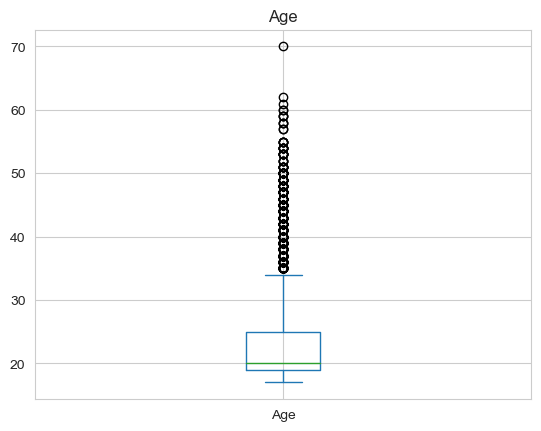

In [106]:
# Detect Outliers in Age 
sns.set_style('whitegrid')
ax = df_student_dropout['Age'].plot(kind='box')
plt.title('Age')
plt.show()

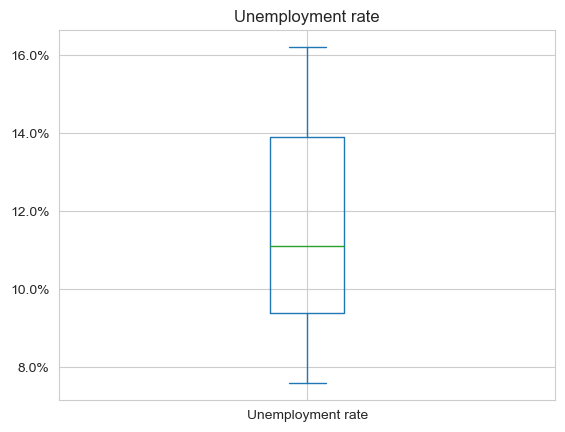

In [107]:
# Detect Outliers in Unemployment rate 
ax = df_student_dropout['Unemployment rate'].plot(kind='box')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Unemployment rate')
plt.show()

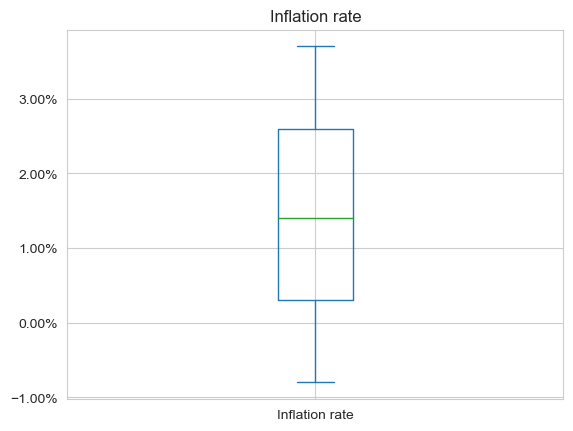

In [108]:
# Detect Outliers in Inflation rate 
ax = df_student_dropout['Inflation rate'].plot(kind='box')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Inflation rate')
plt.show()

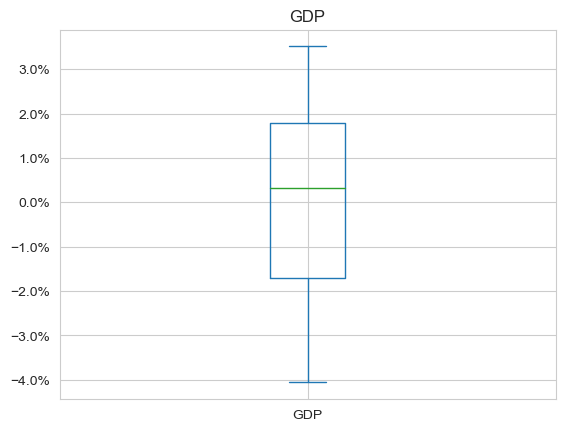

In [109]:
# Detect Outliers in GDP 
ax = df_student_dropout['GDP'].plot(kind='box')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('GDP')
plt.show()

#### Observations
There are no outliers detected in the dataset. The chosen variables are the only numerical variables that can have outliers. The curricular units and grades can have anamolies, but that cannot be conisdered as outliers. There is one anamoly detected in Age. One student has an age of 70 which can possibly happen. 

## Exploratory Data Analysis
Before implementing an algorithm, it is necessary to examine the characteristics of the dataset.

### Countplot for Target

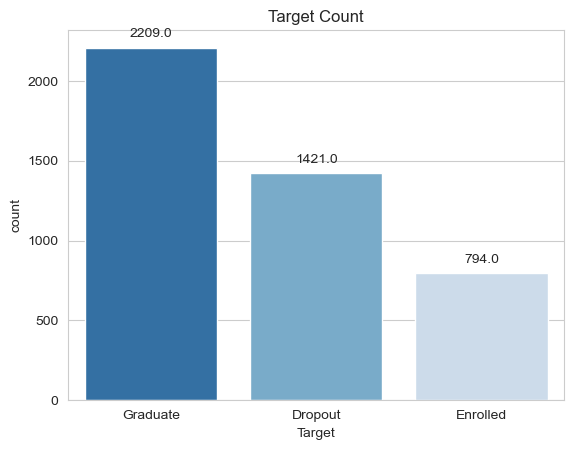

In [110]:
sns.countplot(x='Target', data=df_student_dropout,order = df_student_dropout['Target'].value_counts().index,palette='Blues_r')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.title('Target Count')
plt.show()

### Histogram for Age Distribution

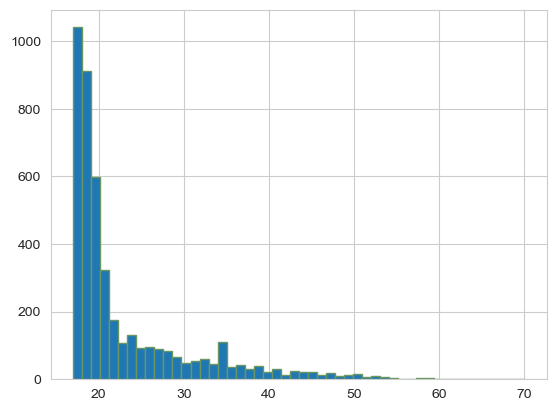

In [111]:
plt.hist(x=df_student_dropout['Age'],bins=50,histtype='bar',edgecolor="#6A9662")
plt.show()

### Assigning Target Numerical Values

In [112]:
#Copying the dataframe
new_df_student_dropout = df_student_dropout.copy()
#Assigning Numerical values to target
new_df_student_dropout['Target'] = new_df_student_dropout['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

### Correlation Heatmap with value greater than 0.1

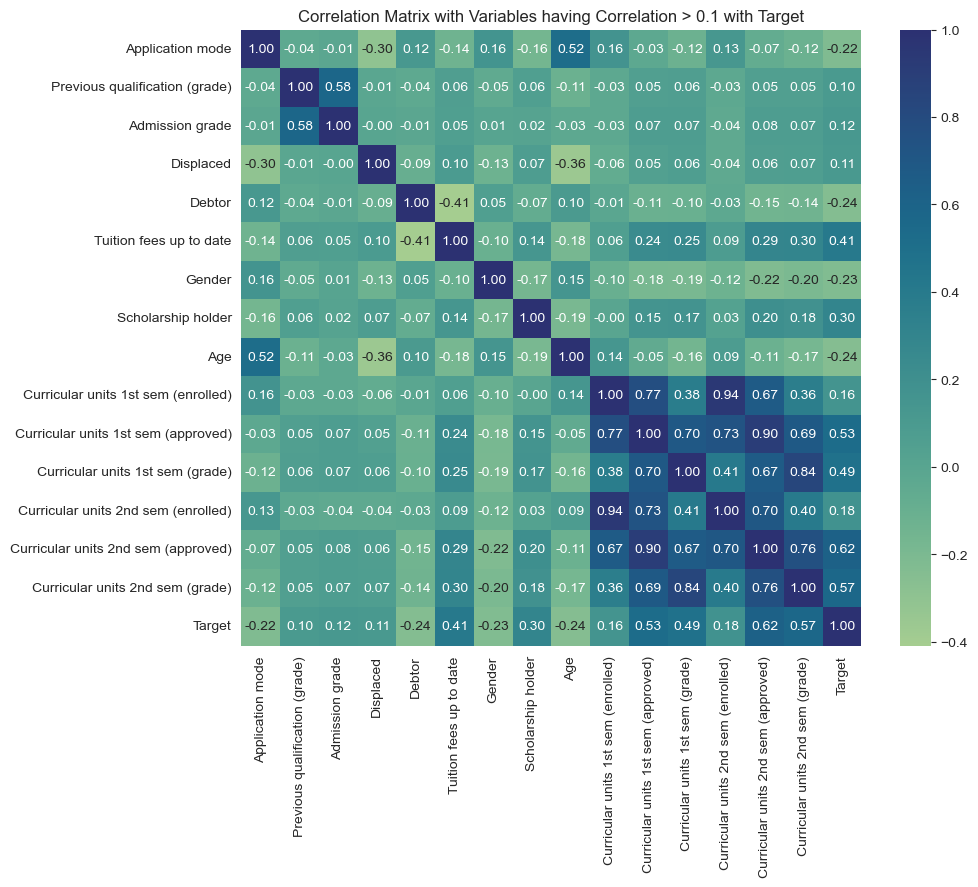

In [113]:
#Filtering variables having correlation<0.1
filtered_variables = new_df_student_dropout.corr()['Target'].abs() > 0.1
filtered_df = new_df_student_dropout.loc[:, filtered_variables]
# Plotting Heatmap
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f",linecolor='black')
plt.title('Correlation Matrix with Variables having Correlation > 0.1 with Target')
plt.show()

### Visualizing Relation Between Target, Age and Gender

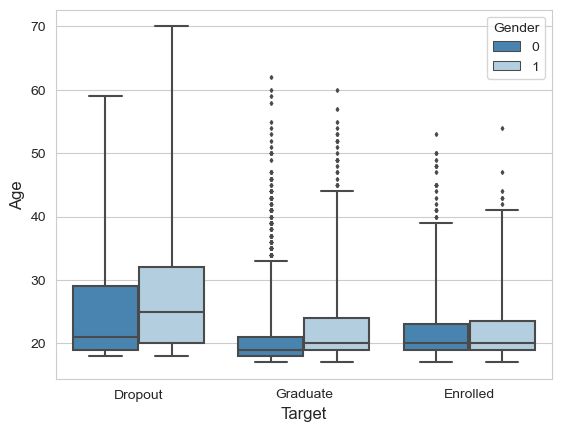

In [114]:
sns.boxplot(df_student_dropout,x='Target',y='Age',hue='Gender',palette='Blues_r',
            fliersize=2,whis=4)
plt.xlabel('Target',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

## Algorithm Selection and Implementation
There are many algorithms that can be used for classification problems. Considering the data characteristics the most suitable algorithm is Random Forest. Random Forest uses ensemble method which is based on multiple decision trees to classify the target variable. However, random forest is difficult to interpret unlike a single decision tree. Cleaning the data is essential before applying algorithms like this one to ensure no overfitting happens. One main advantage is resistance to outliers and noisy data. It can handle outliers easily as a single tree will not determine the final classification. 

### Random Forest Classifier

Only the Vairables having correlation greater than 0.1 with the target variable are used. This will reduce the noise in the algorithm.
#### Data Preprocessing

In [115]:
filtered_df['Target'] = filtered_df['Target'].map({
    0:'Dropout',
    1:'Enrolled',
    2:'Graduate'
})

C:\Users\BAHU Computers\AppData\Local\Temp\ipykernel_7744\3022617230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Target'] = filtered_df['Target'].map({


In [116]:
X = filtered_df.drop('Target', axis=1)
y = filtered_df['Target']
print(X.shape)
print(y.shape)

(4424, 15)
(4424,)


In [117]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

#### Model Implementation

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 15)
(885, 15)
(3539,)
(885,)


In [119]:
rf_classifier = RandomForestClassifier(random_state=15,n_estimators=200)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=15)

In [120]:
y_pred = rf_classifier.predict(X_test)

### Evaluation Metrics
Evaluation metrics are used to access the model performance. Which metrics should be used depends on the data and the type of model applied. Since this model is used to predict multi-class target, confusion matrix or cross-validation is the best choice. Confusion matrix can be used to evaluate the performance of both binary and multi-classification models. Classification Report is also another most used evaluation metric for classification models. Similarly, cross-validation scores are also used for multi-clalssification models. CV score helps reduce over-fitting by dividing the training data into given number of subsets. Three different metrics are used to evaluaute the model performance clearly. 

In [121]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#### Classification Report

In [122]:
print(f'Accuracy: {accuracy:.4f}\n')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7672


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.51      0.30      0.38       151
    Graduate       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



#### Confusion Matrix

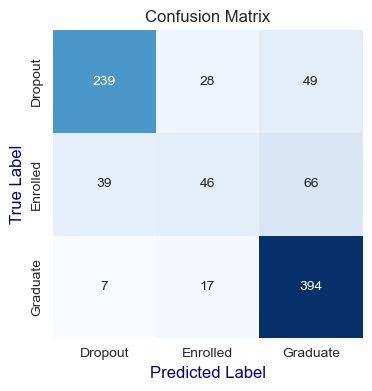

In [123]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label',color='darkblue',fontsize=12)
plt.ylabel('True Label',color='darkblue',fontsize=12)
plt.show()

#### CV Score

In [124]:
score_rf=cross_val_score(RandomForestClassifier(random_state=35,n_estimators=150),X_normalized ,y ,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.76949153 0.76949153 0.76119403]
Avg : 0.7667256935660679


#### Computing Feature Importance

In [125]:
feature_importance = rf_classifier.feature_importances_
features = X.columns

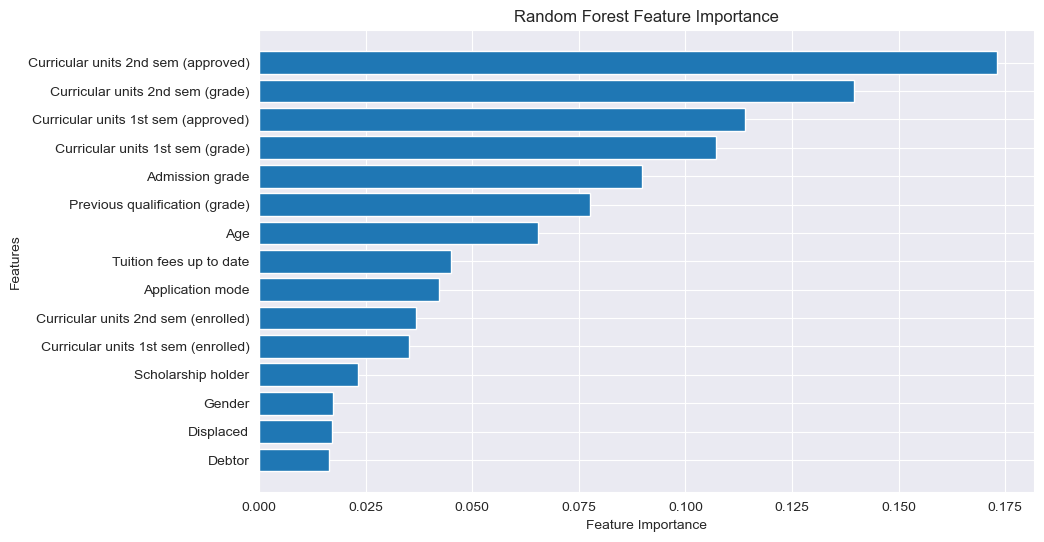

In [126]:
sns.set_style('darkgrid')
sorted_idx = np.argsort(feature_importance)[::1]
plt.figure(figsize=(10, 6))
plt.barh(width=feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Results and Discussions

### Model Findings
Evaluation of the model using the right technique gives an fair idea of where your model stands. In this project, three evaluation methods are used to access the model performance. The findings in each of the method are:

**1. Classification Report**
- Accuracy of random forest is **76.7%**
- For "Dropout," the precision is 0.84, meaning that **84%** of instances predicted as "Dropout" by the model were actually "Dropout" students.For "Enrolled," the precision is **51%** and it is **77%** for Graduates. 
- For "Dropout," the recall is 0.76, suggesting that the model captured **76%** of the actual "Dropout" instances.For "Enrolled," the recall is **30%**, and for "Graduate," the recall is **94%**
- For "Dropout," the F1-score is **0.80**, For "Enrolled," the F1-score is **0.38**, indicating a trade-off between precision and recall for "Enrolled."For "Graduate," the F1-score is **0.85**, showing a good balance between precision and recall for "Graduate."-

**2. CV Score**
- The CV score is determined along multiple subsets of the training data. This model has an average CV score of 0.766 and it is approximately 0.766 along all the three models. 0.766 CV score. This model predicts 76% of the classifications correctly.

**3. Confusion Matrix**
- Confusion matrix tells about the true values and false values. There are four types of values: True positive, True negative, False Positive and False negative. The diagonal values represents true values and non-diagnoal shows errors made by model. 
- The true predicted values for enrolled are 46 while false values predicted are 99. For Dropout and Graduate, 239 and 394 values are predicted true and 77 and 24 values are predicted false respectively

### Model Interpretation
- The target variable category "enrolled " has low recall and F1-score. It is not classified well with the training data. There needs to be some feature engineering to ensure the model precision. 
- The data is not characterizing enrolled well. There needs to be some more data combined to ensure accurate prediction. 
- "Graduate" category is classified with 94% recall score. However, its precision is 77% with random forest algorithm. 

## Conclusion
This project uses random forest algorithm to classify students academic success based on whether they are Dropouts, Enrolled or Graduated. Random forest works well with multi-classification problems like this. Three model evaluation methods are used to ensure correct analysis. However, there is some space for new data to be joined to maximize model precision for all three target categories well. Instead of technical reasons for students Dropouts, there needs to be some sort of social reason assoicated with the data. 

## References
- https://link.springer.com/article/10.1007/s11749-016-0481-7
- https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://www.geeksforgeeks.org/what-is-data-normalization/